(500, 784) (500,)
(500, 784) (500,)


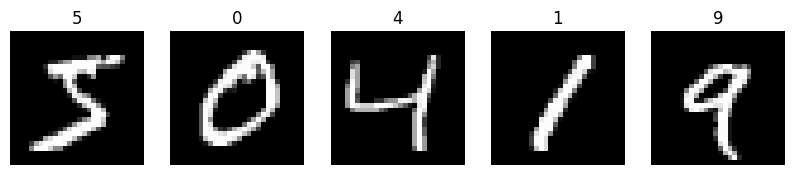

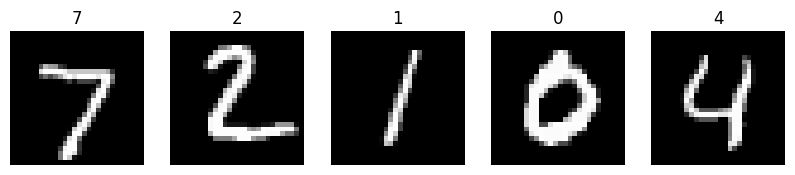

In [2]:
#Load Dataset 
 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import struct 
import pandas as pd 
 
# === Step 1: Load MNIST Dataset === 
def load_mnist_images(filename): 
    with open(filename, 'rb') as f: 
        _, num, rows, cols = struct.unpack(">IIII", f.read(16)) 
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows * cols) 
        return images / 255.0 
 
def load_mnist_labels(filename): 
    with open(filename, 'rb') as f: 
        _, num = struct.unpack(">II", f.read(8)) 
        labels = np.frombuffer(f.read(), dtype=np.uint8) 
        return labels 
 # Students can experiment to modify number of Train 
X_train = load_mnist_images("train-images.idx3-ubyte___")[:500]
y_train = load_mnist_labels("train-labels.idx1-ubyte___")[:500] 
X_test = load_mnist_images("t10k-images.idx3-ubyte___")[:200] 
y_test = load_mnist_labels("t10k-labels.idx1-ubyte___")[:200]

def plot_images(images, labels): 
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5)) 
    for i, (image, label) in enumerate(zip(images, labels)): 
        axes[i].imshow(image.reshape(28, 28), cmap='gray') 
        axes[i].axis('off') 
        axes[i].set_title(label) 
    plt.show()


print(X_train.shape, y_train.shape)
print(X_train.shape, y_train.shape)
plot_images(X_train[:5], y_train[:5])

plot_images(X_test[:5], y_test[:5])


In [32]:
# === Step 2: Activation Functions (Refer to Eq. 6.14 - 6.18) === 
def relu(x): 
    return np.maximum(0, x)

def tanh(x): 
    return np.tanh(x) 

def softplus(x): 
    return np.log(1 + np.exp(x))

def leaky_relu(x, alpha=0.1): 
    return np.maximum(alpha * x, x)
 
def one_hot(y, num_classes=10): 
    one_hot_y = np.zeros((y.size, num_classes)) 
    one_hot_y[np.arange(y.size), y] = 1 
    return one_hot_y

def cross_entropy(y_pred, y_true): 
    samples = y_pred.shape[0]
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) # Avoid log(0)
    if len(y_true.shape) == 1: # If y_true is not one-hot encoded
        correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2: # If y_true is one-hot encoded
        correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

def softmax(a): 
    exp_a = np.exp(a - np.max(a, axis=1, keepdims=True))
    probabilities = exp_a / np.sum(exp_a, axis=1, keepdims=True)
    return probabilities

def forward_pass(X, weights, biases, activations):
    a = X 
    for i in range(len(activations)): 
        a = activations[i](np.dot(a, weights[i]))+ biases[i]
    return a

def backward_pass(X, y, weights, activations, loss_fn):
    a = forward_pass(X, weights, activations)
    loss = loss_fn(a, y)
    grad = a.copy()
    grad[range(X.shape[0]), y] -= 1
    grad /= X.shape[0]
    for i in reversed(range(len(weights))):
        grad = np.dot(grad, weights[i].T) * (activations[i](X) > 0)
        weights[i] -= np.dot(X.T, grad) * 0.01
        X = np.dot(X, weights[i])
        X = activations[i](X)
    return loss, weights

In [56]:
# === Step 3: Training Loop === # Students can experiment to modify
np.random.seed(4) 
input_size = 784 
hidden1 = 128 
hidden2 = 128 
output_size = 10 
epochs = 1000
best_loss = float('inf') 
best_biases = None
best_weights = None



for epoch in range(epochs): 
    # TODO: Randomly initialize weights for each layer 
    W1 = np.random.randn(input_size, hidden1)*0.05
    b1 = np.random.randn(hidden1)*0.005
    W2 = np.random.randn(hidden1, hidden2)*0.05
    b2 = np.random.randn(hidden2)*0.005
    W3 = np.random.randn(hidden2, output_size)*0.05
    b3 = 0
 
    weights = [W1, W2, W3] 
    biases = [b1, b2, b3]  # Not used in forward pass but can be added if needed
    activations = [relu, relu, softmax]  # Students can experiment to modify

    y_pred = forward_pass(X_train, weights, biases, activations)

    loss = np.mean(cross_entropy(y_pred, y_train)) # Refer to Eq. 6.36
    if loss < best_loss: 
        best_loss = loss 
        best_weights = weights
        best_biases = biases
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, best_loss: {best_loss:.4f}")




    

Epoch 1/1000, Loss: 2.3030, best_loss: 2.3030
Epoch 2/1000, Loss: 2.3012, best_loss: 2.3012
Epoch 3/1000, Loss: 2.3024, best_loss: 2.3012
Epoch 4/1000, Loss: 2.3117, best_loss: 2.3012
Epoch 5/1000, Loss: 2.3152, best_loss: 2.3012
Epoch 6/1000, Loss: 2.3037, best_loss: 2.3012
Epoch 7/1000, Loss: 2.3086, best_loss: 2.3012
Epoch 8/1000, Loss: 2.3078, best_loss: 2.3012
Epoch 9/1000, Loss: 2.2939, best_loss: 2.2939
Epoch 10/1000, Loss: 2.2929, best_loss: 2.2929
Epoch 11/1000, Loss: 2.3028, best_loss: 2.2929
Epoch 12/1000, Loss: 2.3070, best_loss: 2.2929
Epoch 13/1000, Loss: 2.3157, best_loss: 2.2929
Epoch 14/1000, Loss: 2.3052, best_loss: 2.2929
Epoch 15/1000, Loss: 2.3062, best_loss: 2.2929
Epoch 16/1000, Loss: 2.2924, best_loss: 2.2924
Epoch 17/1000, Loss: 2.3073, best_loss: 2.2924
Epoch 18/1000, Loss: 2.3002, best_loss: 2.2924
Epoch 19/1000, Loss: 2.3053, best_loss: 2.2924
Epoch 20/1000, Loss: 2.3076, best_loss: 2.2924
Epoch 21/1000, Loss: 2.3062, best_loss: 2.2924
Epoch 22/1000, Loss: 2

In [57]:
# === Step 4: Evaluation Metrics (Confusion Matrix, ROC, etc) === 
def compute_confusion_matrix(y_true, y_pred, num_classes=10): 
    cm = np.zeros((num_classes, num_classes)) 
    for i in range(len(y_true)): 
        cm[y_true[i], y_pred[i]] += 1 
    return cm

# === ROC Curve === 
def compute_roc(y_true, y_scores):
    fpr = []
    tpr = []
    thresholds = np.unique(y_scores)
    for threshold in thresholds:
        y_pred = [1 if i > threshold else 0 for i in y_scores]
        cm = compute_confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    return fpr, tpr
 
# === Classification Report === Print TP, FP, FN, TN, precision, recall, f1, accuracy 
def compute_metrics(cm):
    tp = np.diag(cm)
    fp = np.sum(cm, axis=0) - tp
    fn = np.sum(cm, axis=1) - tp
    tn = np.sum(cm) - (tp + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    return tp, fp, fn, tn, precision, recall, f1, accuracy
 


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[7 5 5 7 7 5 4 4 7 9 7 7 4 9 7 4 7 7 4 7 5 7 7 3 7 7 7 7 7 7 5 7 4 7 4 7 7
 7 7 7 3 7 4 3 3 3 7 4 7 2 5 4 5 4 7 4 7 5 7 9 7 5 5 7 9 5 7 7 5 5 7 7 7 9
 7 7 3 7 9 7 5 4 7 7 7 9 7 7 4 7 7 4 5 5 7 4 7 7 7 7 4 7 3 7 7 7 7 9 5 4 7
 5 5 4 7 7 7 7 4 7 9 5 7 7 4 7 7 5 4 5 5 7 7 4 7 7 7 9 7 7 5 7 7 3 7 7 7 7
 4 4 7 7 5 9 7 9 4 4 4 7 5 4 9 7 5 9 4 7 7 4 5 7 7 4 7 7 3 9 7 7 7 7 5 7 9
 7 7 9 7 7 7 7 5 7 7 7 7 7 4 7]


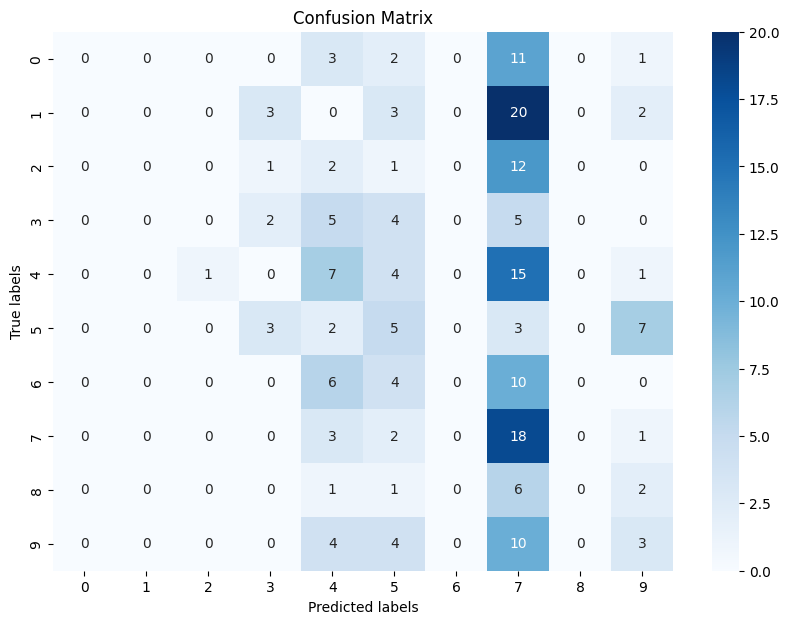

In [62]:
y_pred = forward_pass(X_test, best_weights, best_biases, activations) # Forward Pass (Eq. 6.19) ===
y_pred_one_hot = one_hot(y_pred.argmax(axis=1), num_classes=10)
print(y_pred_one_hot)
y_pred_labels = np.argmax(y_pred_one_hot, axis=1)
print(y_pred_labels)
cm = compute_confusion_matrix(y_test, y_pred_labels,10)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



Class 0:
TP: 0.0, FP: 0.0, FN: 17.0, TN: 183.0
precision: 0.0 
recall: 0.0 
f1: 0.0

Class 1:
TP: 0.0, FP: 0.0, FN: 28.0, TN: 172.0
precision: 0.0 
recall: 0.0 
f1: 0.0

Class 2:
TP: 0.0, FP: 1.0, FN: 16.0, TN: 183.0
precision: 0.0 
recall: 0.0 
f1: 0.0

Class 3:
TP: 2.0, FP: 7.0, FN: 14.0, TN: 177.0
precision: 0.2222222222222222 
recall: 0.125 
f1: 0.16

Class 4:
TP: 7.0, FP: 26.0, FN: 21.0, TN: 146.0
precision: 0.21212121212121213 
recall: 0.25 
f1: 0.22950819672131145

Class 5:
TP: 5.0, FP: 25.0, FN: 15.0, TN: 155.0
precision: 0.16666666666666666 
recall: 0.25 
f1: 0.2

Class 6:
TP: 0.0, FP: 0.0, FN: 20.0, TN: 180.0
precision: 0.0 
recall: 0.0 
f1: 0.0

Class 7:
TP: 18.0, FP: 92.0, FN: 6.0, TN: 84.0
precision: 0.16363636363636364 
recall: 0.75 
f1: 0.26865671641791045

Class 8:
TP: 0.0, FP: 0.0, FN: 10.0, TN: 190.0
precision: 0.0 
recall: 0.0 
f1: 0.0

Class 9:
TP: 3.0, FP: 14.0, FN: 18.0, TN: 165.0
precision: 0.17647058823529413 
recall: 0.14285714285714285 
f1: 0.15789473684210528

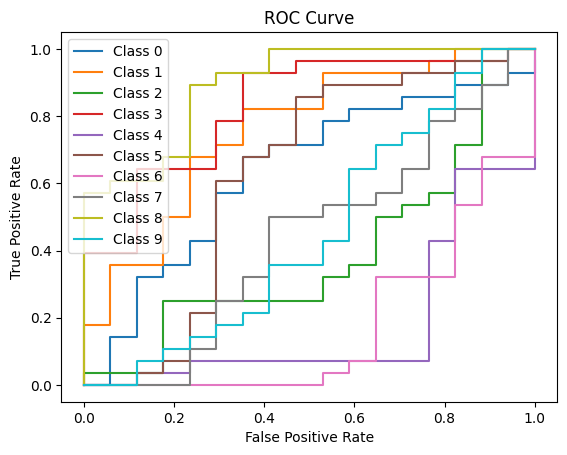

In [63]:
#print every classes TP FP FN TN precision recall f1 accuracy
TP = np.zeros(10)
FP = np.zeros(10)
FN = np.zeros(10)
TN = np.zeros(10)
precision = np.zeros(10)
recall = np.zeros(10)
f1 = np.zeros(10)

for i in range(10):
    TP[i] = cm[i][i]
    FP[i] = np.sum(cm[:, i]) - TP[i]
    FN[i] = np.sum(cm[i, :]) - TP[i]
    TN[i] = np.sum(cm) - (TP[i] + FP[i] + FN[i])
    precision[i] = TP[i] / (TP[i] + FP[i]) if (TP[i] + FP[i]) > 0 else 0
    recall[i] = TP[i] / (TP[i] + FN[i]) if (TP[i] + FN[i]) > 0 else 0
    f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0

for i in range(10):
    print(f"Class {i}:")
    print(f"TP: {TP[i]}, FP: {FP[i]}, FN: {FN[i]}, TN: {TN[i]}")
    print(f"precision: {precision[i]} \nrecall: {recall[i]} \nf1: {f1[i]}\n")
print(f"Overall accuracy: {np.sum(TP) / np.sum(cm)}")   

#ROC Curve for ALL MNIST classes
for i in range(10):
    fpr, tpr = compute_roc(y_test, y_pred[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()